Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# 1. Загрузка и обработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st

Поехали загружать и смотреть данные, для удобства напишем функцию вывода общей информации и первых десяти строк датасета.

In [2]:
def first_view(df):
    print(df.info()) 
    return df.head(10)

In [3]:
model = pd.read_csv('/datasets/query_1.csv')
first_view(model)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model['model'] = model['model'].astype('str')

In [5]:
city = pd.read_csv('/datasets/query_3.csv')
first_view(city)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Приводим показатель количества средних полётов в день к целочисленному значению. 

In [6]:
city['average_flights'] = city['average_flights'].round().astype(int)

In [7]:
festival = pd.read_csv('/datasets/query_last.csv')
first_view(festival)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
None


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [8]:
festival =  festival.fillna('empty')

# 2. Графики и их анализ

In [9]:
city_asc = city.sort_values(by='average_flights', ascending = False)

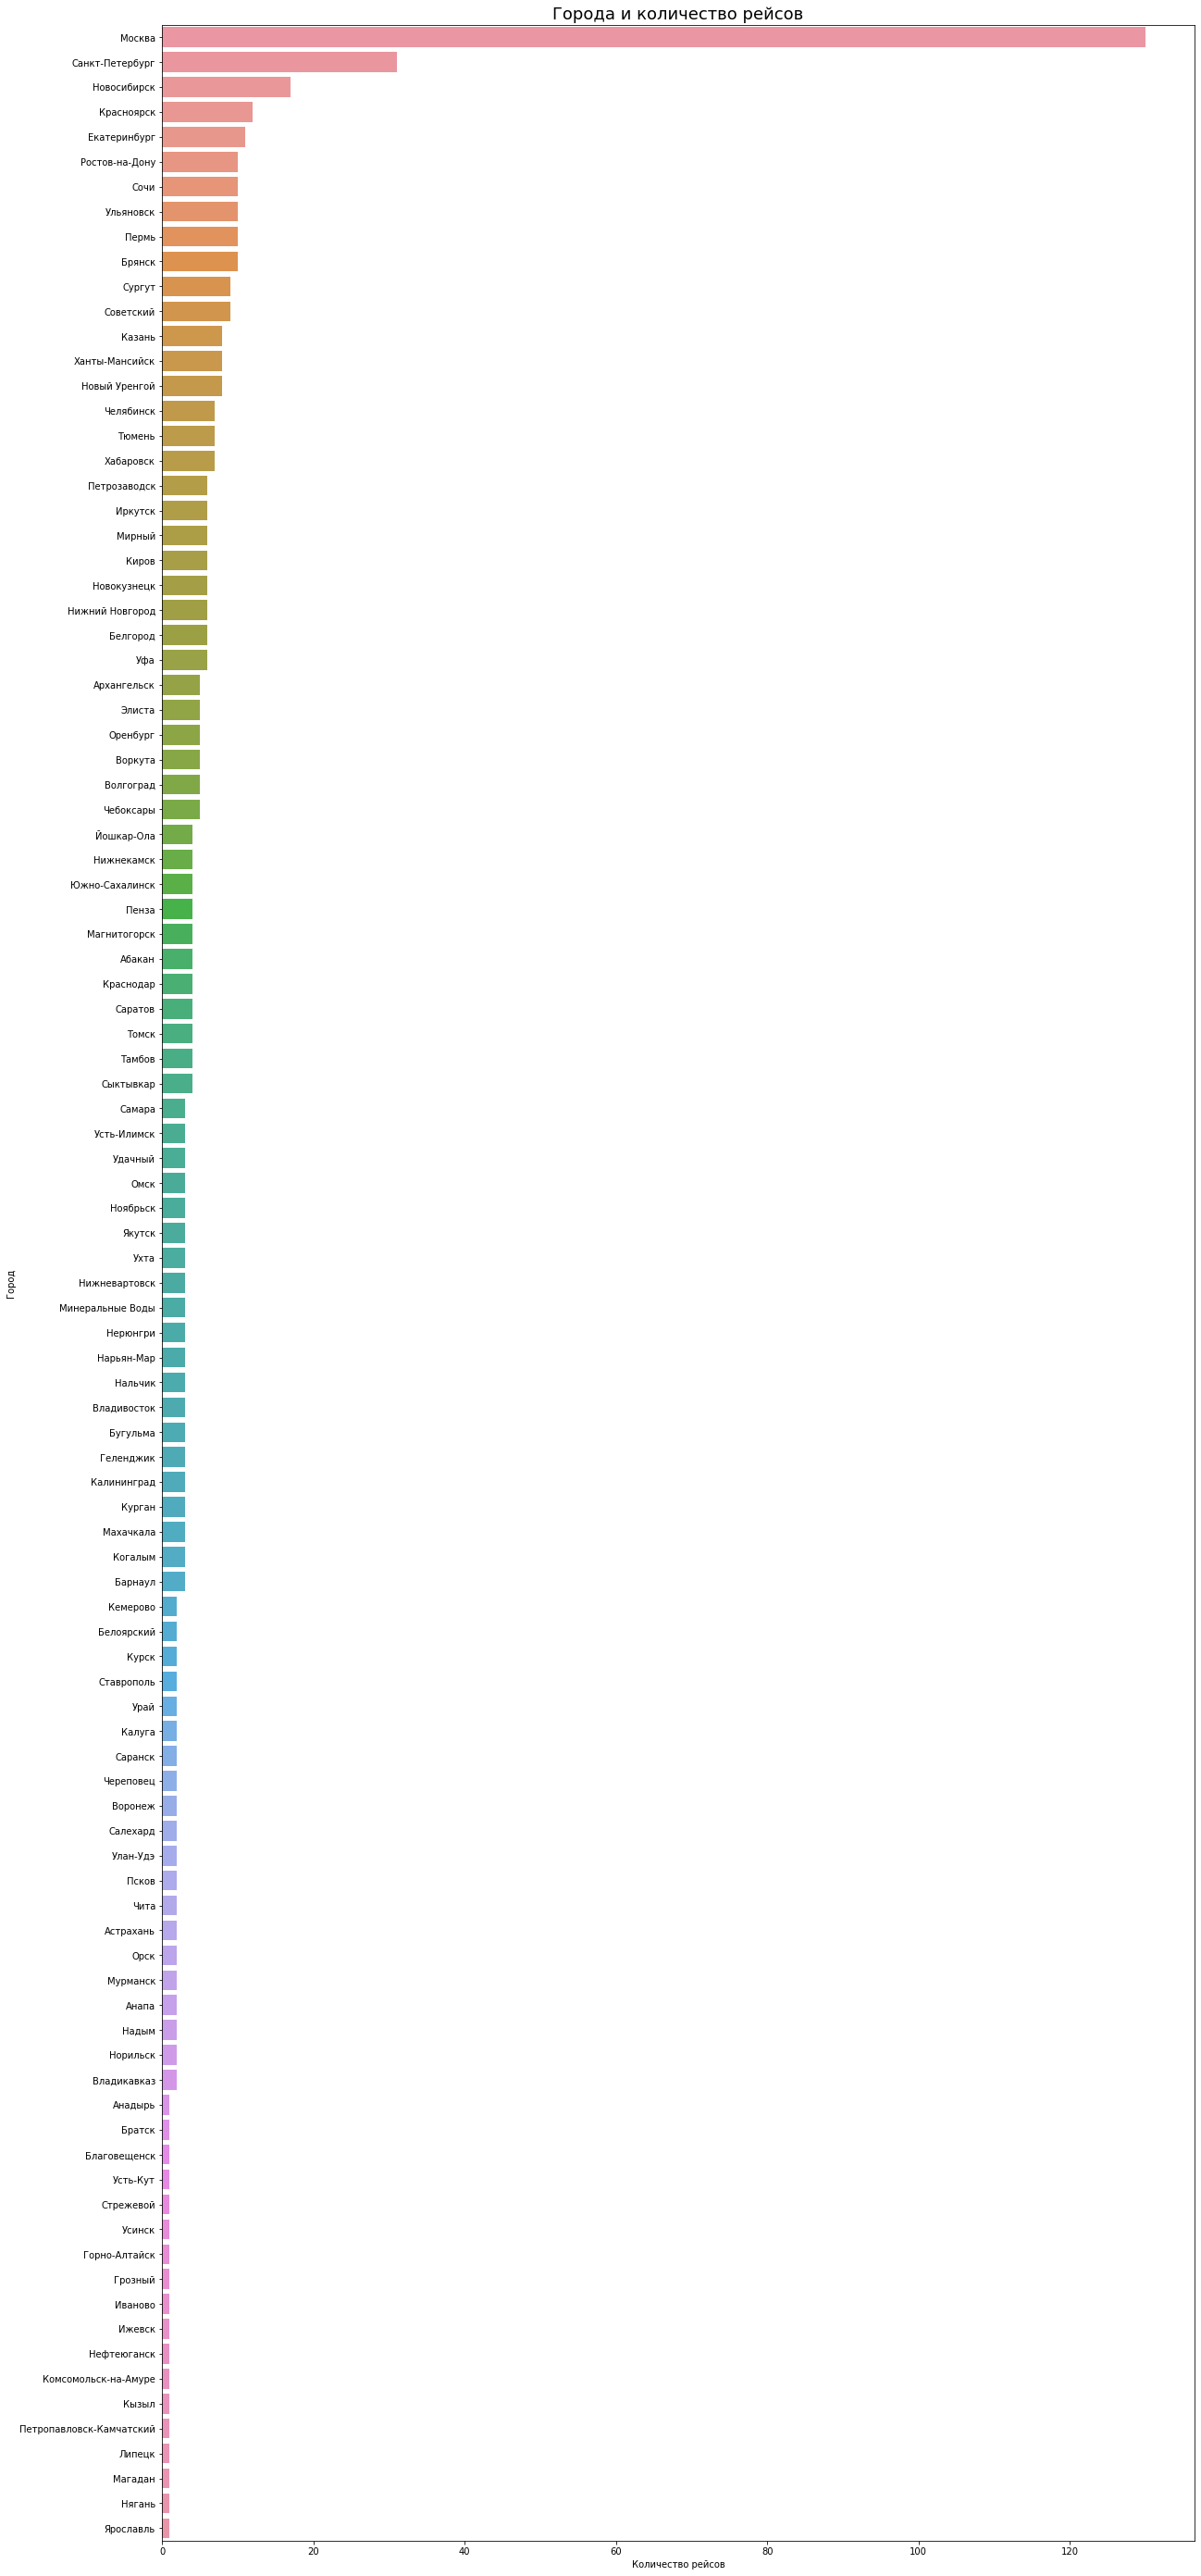

In [10]:
fig, ax = plt.subplots(1, figsize=(20, 50))
ax = sns.barplot(y = 'city', x= 'average_flights', data = city_asc)
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
ax.set_title('Города и количество рейсов', fontdict={'fontsize': 18});

В принципе, всё довольно очевидно, с огромным преимуществом на первом месте стоит Москва. Нужно учитывать также и количество принимающих аэродромов города и тот факт, что Москва является центральным хабом как для внутренних, так и для международных рейсов (за границей ещё можно было летать, привет, 2018, мы не знали, как ты хорош!).
Далее идёт Петербург - вторая столица России. Затем - разный юг. Скорее всего, в летний период (а у нас данные за сентябрь) рейсов в Сочи, Ростов-на-Дону было бы ещё больше, хотя и сентябрь считается "бархатным" сезоном. Плюс, в топ-10 находятся города, где активна добыча ценных ископаемых (т.е. это скорее всего командировки; насколько я понимаю, люди из таких профессиональных областей работают преимущественно вахтовым методом).

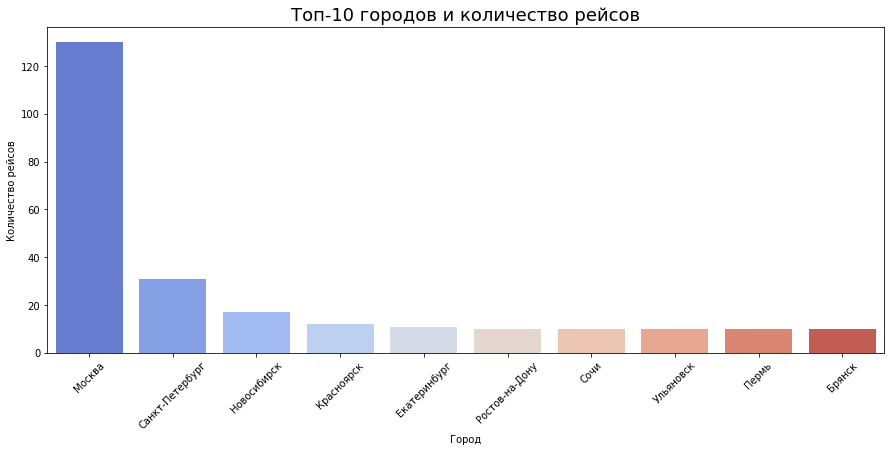

In [11]:
city_sort = city.sort_values(by='average_flights', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=city_sort.city, y=city_sort.average_flights, 
            data=city_sort.sort_values(by='average_flights'), 
            palette='coolwarm')
ax.set_title('Топ-10 городов и количество рейсов', fontdict={'fontsize': 18})
plt.xticks(rotation=45)
plt.xlabel('Город')
plt.ylabel('Количество рейсов');

Вывели топ-10 городов по количеству рейсов, первые шесть строчек - города-миллионники. Далее идёт Сочи как ставший популярной точкой внутренного туризма после Олимпийских игр. 

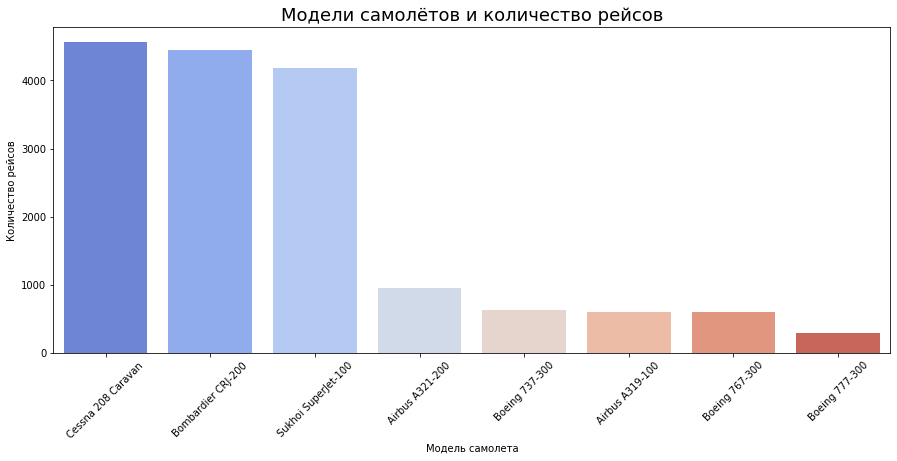

In [12]:
model_sort = model.sort_values(by='flights_amount', ascending = False)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=model_sort.model, y=model_sort.flights_amount, 
            data=model_sort.sort_values(by='flights_amount'), 
            palette='coolwarm')
ax.set_title('Модели самолётов и количество рейсов', fontdict={'fontsize': 18})
plt.xticks(rotation=45)
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов');

Первое место среди самолетов и количества рейсов уходит Cessna 208 Caravan, удивительно, что на борту могут находиться только до 13 (!!) (https://ru.wikipedia.org/wiki/Cessna_208) пассажиров. Вообще, Сессна напоминает наши отечественные Як'и или Ан'нушки, такие борта обычно используются на очень коротких расстояниях, например на рейсах Южно-Сахалинск - Южно-Курильск (1h15min duration). Далее идут похожие классом Bombardier и Сухой Суперджет. Затем с треском отстают авиалайнеры из семейств Аэробуса и Боинга, которые используются на рейсах больших расстояний (например, Москва - Владивосток, среднее время в пути - 8ч30м; любопытно отметить, что обратный рейс Владивосток - Москва всегда занимает больше времени, в среднем на 20-25 минут, думаю, это связано с вращением нашей планеты, потому что с Дальнего Востока в Москву воздушное судно идёт против движения).

Ну что же, займёмся проверкой гипотезы.

# 3. Формулировка и проверка гипотезы

In [13]:
festival_true = festival.query('festival_week != "empty"')

In [14]:
festival_true = festival_true['ticket_amount']

In [15]:
festival_false = festival.query('festival_week == "empty"')

In [16]:
festival_false = festival_false['ticket_amount']

Сформулируем нулевую гипотезу как: "Нет связи между продажами билетов и временем проведения фестивалей".

In [17]:
alpha = 0.05

In [20]:
results = st.ttest_ind(festival_true, festival_false, equal_var = False)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Итак, путём сухих подсчётов выясняли, что связи между фестивалями и продажей билетов - не существует. Однако, это можно считать только предварительным заключением, которое стоит разработать в дальнейшем исследовании. 